**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)
sns.set_theme()

In [3]:
df = pd.read_csv(
    "data/marketing_campaign.csv",
    sep="\t",
    index_col="ID",
    parse_dates=True,
)

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


# Présentation

## Problématique

Dans le rôle d'analystes de données en mission pour un magasin de produits alimentaires, nous chercherons à : 

- Réaliser une segmentation de la clientèle de l'entreprise (clustering),
- Prédire l'efficacité d'une future campagne de marketing (classification binaire)

**Tableau.** Liste de nos objectifs

|  | Mission | Type de tâche            |
| :--- | :--- |:-------------------------|
| Objectif 1 | Segmentation de la clientèle | Clustering non supervisé |
| Objectif 2 | Prédiction d'acceptation à une campagne marketing | Classification binaire   |

**Tableau.** Plan de la présentation

| :--- | :--- |
| **Exploration des données** | Présentation des variables<br>Première visualisation des variables |
| **Pré-traitement des données** | Nettoyage des données<br>Création de variables (Feature Engineering) |
| **Visualisation des données** | Visualisation en fonction de la variable cible |
| **Analyse factorielle** | ACP<br>AFC<br>ACM |
| **ANOVA** | Vérification des hypothèses<br>Test d'ANOVA |
| **Segmentation de clientèle** | Comparaison de différents algorithmes de clusters<br>Visualisation des clusters<br>Description des profils "type" de clients |
| **Prédiction d'acceptation<br>de campagne marketing** | Comparaison de différents modèles de classification<br>Équilibrage des classes<br>Diagnostic du meilleur modèle<br>Conclusion sur l'efficacité de prédiction |

## Jeu de données

Ce jeu de données contient le profil de plusieurs clients d'une enseigne de grande distribution.

Il contient des données datant de juillet 2012 à juillet 2014.

### Lecture des données

In [6]:
df = pd.read_csv(
    "data/marketing_campaign.csv", sep="\t", index_col="ID", parse_dates=True
)

### Présentation des variables

In [7]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [8]:
print(f"Il y a {df.shape[1]} variables et {df.shape[0]} individus.")

Il y a 28 variables et 2240 individus.


#### Variables

- ID: identifiant du client
- Year_Birth: numérique, année de naissance du client
- Education: qualitative, niveau d'éducation
- Marital_Status: qualitative, statut marital
- Income: numérique, revenu annuel en $
- Kidhome: numérique, nombre d'enfants en bas-âge
- Teenhome: numérique, nombre d'enfants adolescents
- Dt_Customer: date, date à laquelle le client s'est inscrit
- Recency: numérique, nombre de jours depuis le dernier achat
- Complain: catégorique, est-ce que le client s'est plaint les 2 dernières années (0 ou 1)

#### Products

- MntWines: numérique, argent dépensé les 2 dernières années en vin
- MntFruits: numérique, argent dépensé les 2 dernières années en fruits
- MntMeatProducts: numérique, argent dépensé les 2 dernières années en viande
- MntFishProducts: numérique, argent dépensé les 2 dernières années en poisson
- MntSweetProducts: numérique, argent dépensé les 2 dernières années en bonbons / gâteaux
- MntGoldProds: numérique, argent dépensé les 2 dernières années en bijoux / or

#### Promotion

- NumDealsPurchases: numérique, nombre d'achats effectués avec une promotion
- AcceptedCmp1: catégorique, le client a-t-il acheté durant la campagne promotionnelle numéro 1 (1 s'il a acheté, 0 sinon)
- AcceptedCmp2: pareil pour la campagne numéro 2
- AcceptedCmp3: pareil pour la campagne numéro 3
- AcceptedCmp4: pareil pour la campagne numéro 4
- AcceptedCmp5: pareil pour la campagne numéro 5
- Response: catégorique, 1 si le client a acheté durant la dernière campagne, 0 sinon (potentielle variable à prédire)

#### Place

- NumWebPurchases: numérique, nombre d'achats effectués sur le site Internet
- NumCatalogPurchases: numérique, nombre d'achats effectués via le catalogue
- NumStorePurchases: numérique, nombre d'achats effectués en magasin
- NumWebVisitsMonth: numérique, nombre de visites sur le site Internet le dernier mois


Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [9]:
var_numeriques = [
    "Year_Birth",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
]

In [10]:
var_categoriques = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [11]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

In [12]:
# todo: convertir en int la variable Income (qui est float)

Nous convertissons les variables au format date.

In [13]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   category      
 2   Marital_Status       2240 non-null   category      
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   category      
 5   Teenhome             2240 non-null   category      
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

# Découverte des données

## Analyse univariée

In [15]:
df[var_numeriques].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [16]:
df[var_categoriques].describe()

,Education,Marital_Status,Kidhome,Teenhome,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,5,8,3,3,2,2,2,2,2,2,2
top,Graduation,Married,0,0,0,0,0,0,0,0,0
freq,1127,864,1293,1158,2219,2096,2210,2077,2073,2077,1906


In [17]:
# todo: commenter

## Visualisation

### Variables numériques

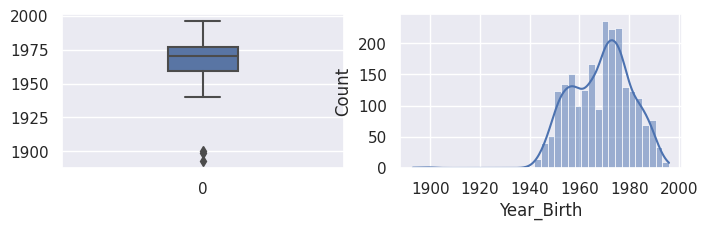

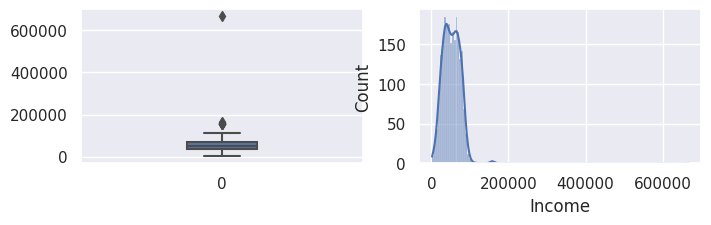

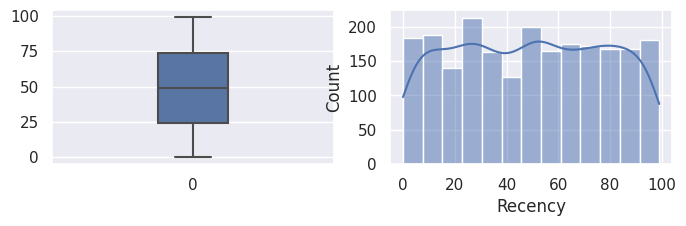

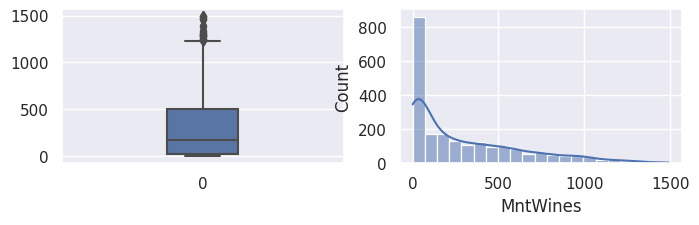

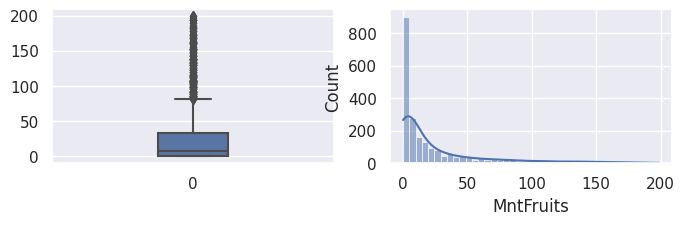

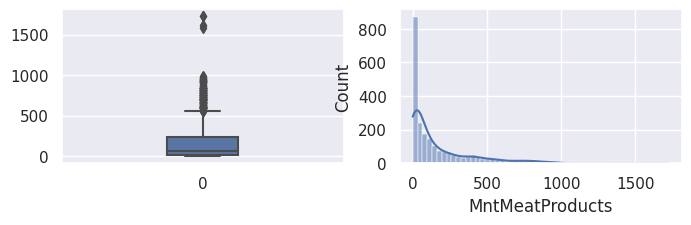

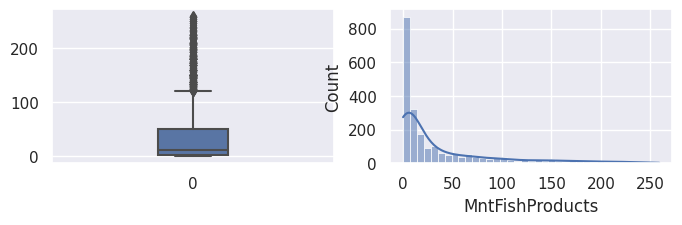

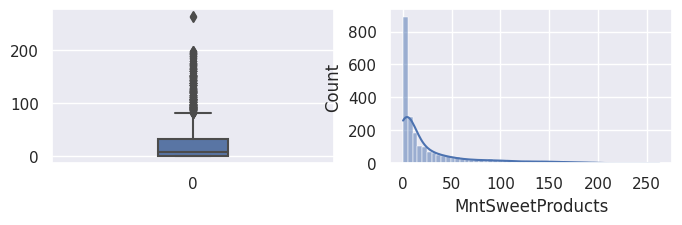

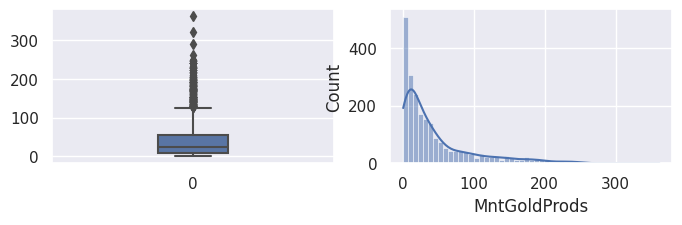

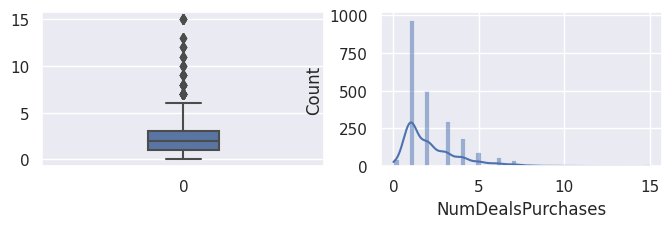

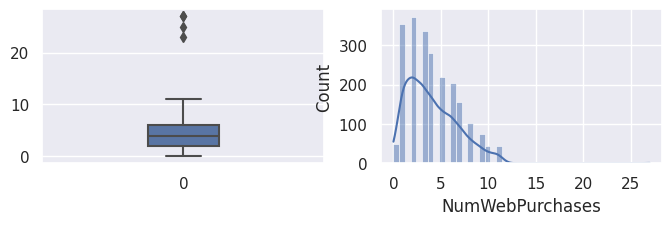

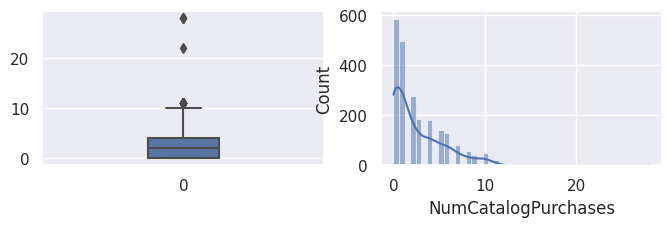

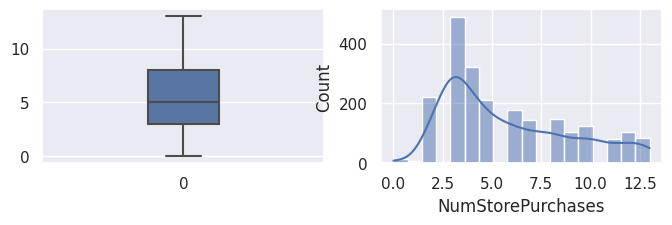

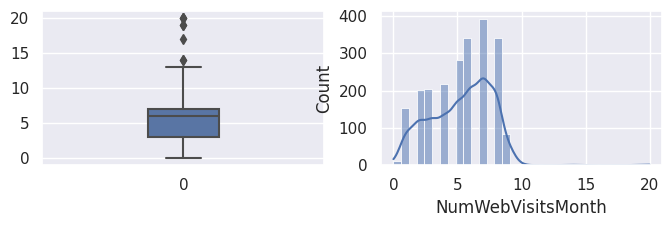

In [18]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

In [19]:
# todo: commenter les distributions et boxplots

<Axes: >

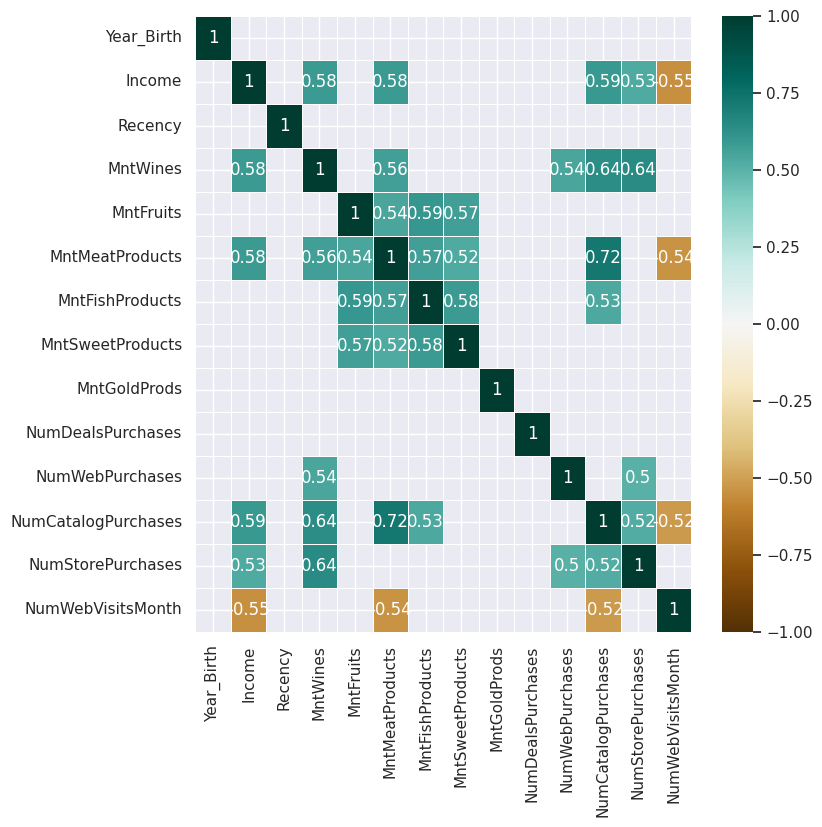

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [21]:
# todo: commenter la matrice de corrélation

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='ID'>

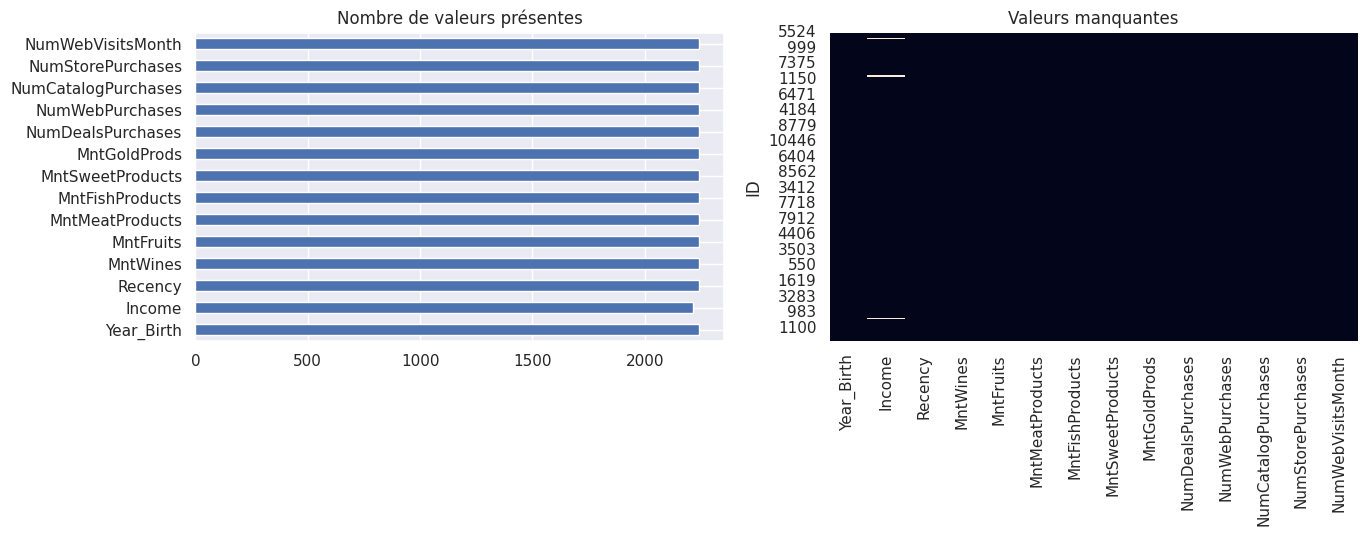

In [22]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_numeriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_numeriques].isna(), cbar=False, ax=ax[1])

Nous observons qu'il n'y a quasiment pas de valeurs manquantes parmi les variables numériques.

### Variables catégoriques

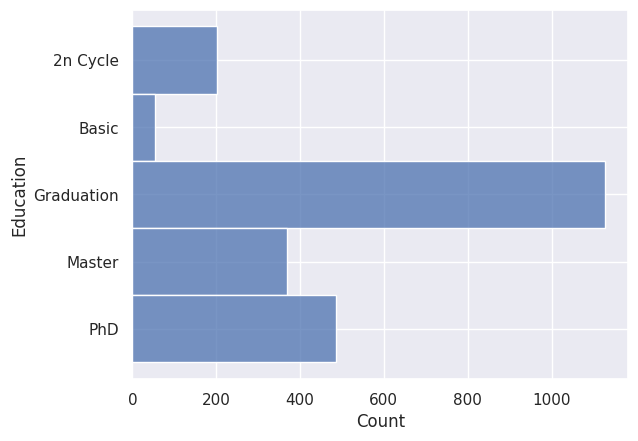

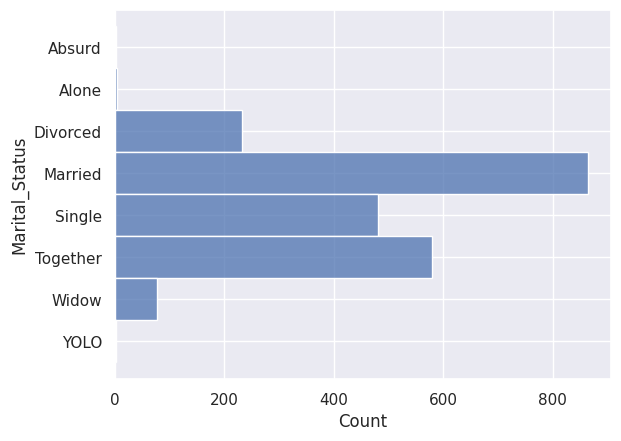

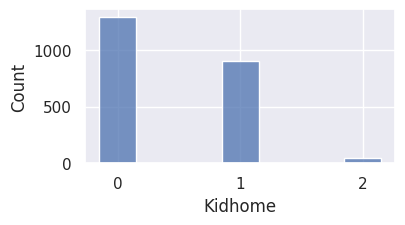

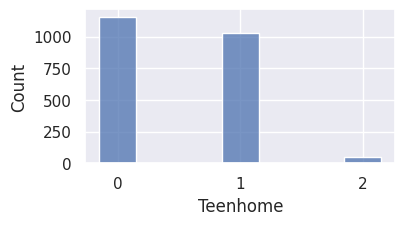

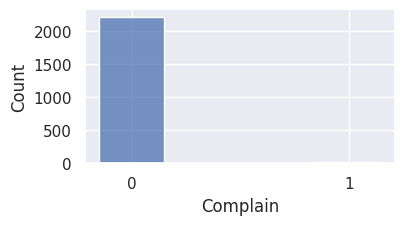

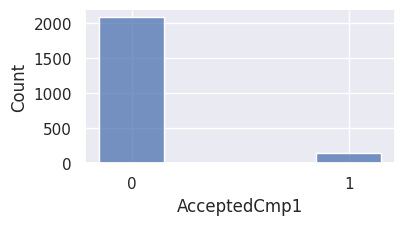

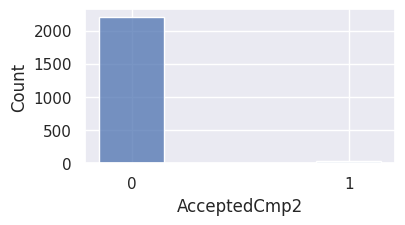

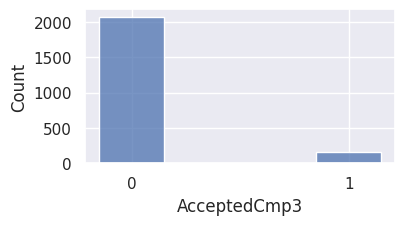

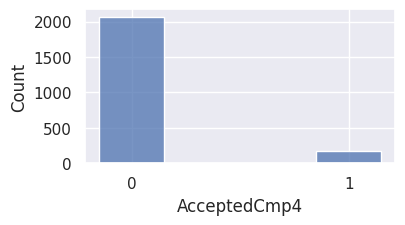

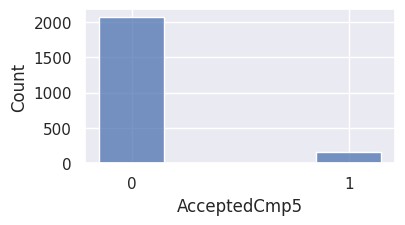

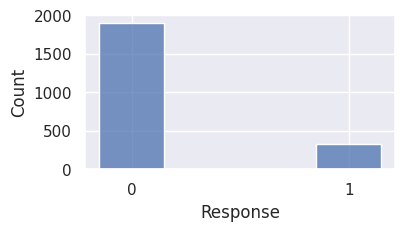

In [23]:
for var in var_categoriques:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

<Axes: xlabel='Education,Marital_Status'>

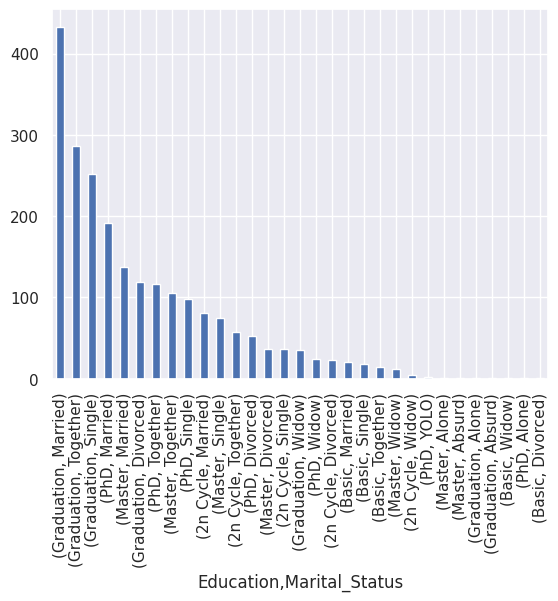

In [24]:
df[
    df[var_categoriques].columns[df[var_categoriques].nunique() > 3]
].value_counts().plot(kind="bar")

In [25]:
# todo: commenter

#### Valeurs manquantes

<Axes: title={'center': 'Valeurs manquantes'}, ylabel='ID'>

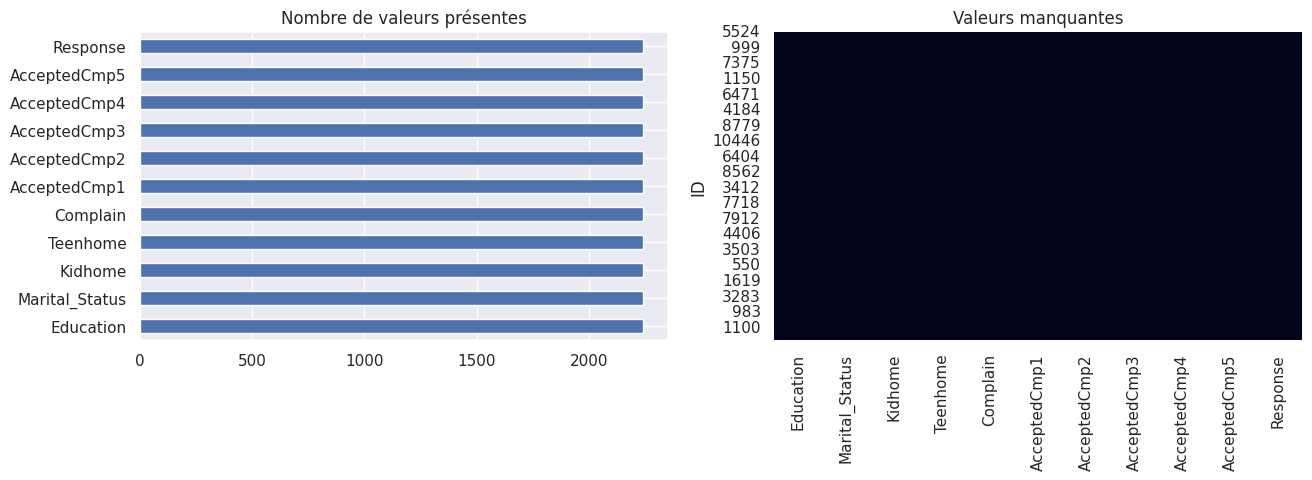

In [26]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_categoriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_categoriques].isna(), cbar=False, ax=ax[1])

Nous observons l'absence de valeurs manquantes parmi les variables catégoriques.

### Dates

In [27]:
# todo

<Axes: >

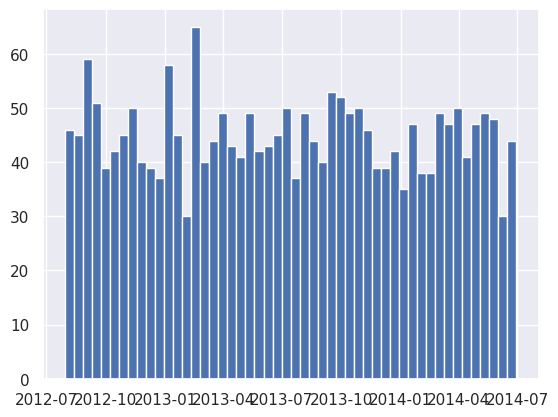

In [28]:
df["Dt_Customer"].hist(bins=50)

# Sauvegarde du Dataframe

In [29]:
df.to_csv("data/data.csv")